# 선형 회귀 모델을 활용한 중고차 가격 예측2

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family = 'Malgun Gothic')

# 1. Data Load

**데이터 설명**

| 변수 명           | 설명                                    |
| ----------------- | --------------------------------------- |
| Year              | 출고년도                                |
| Kilometers_Driven | 주행거리                                |
| Fuel_Type         | 연료 타입                               |
| Owner_Type        | 해당 차량의 주인이 몇 번째 주인이었는지 |
| Mileage           | 연비                                    |
| Engine            | 배기량                                  |
| Power             | 마력                                    |
| Seats             | 좌석 수                                 |
| New_Price         | 해당 차종의 신차 가격                   |



In [ ]:
df = pd.read_csv('car.csv')

df

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker,Price
0,2015,41000,Diesel,First,19.67,1582,126.20,5.0,NaN,Hyundai,12.50
1,2011,46000,Petrol,First,18.20,1199,88.70,5.0,8.61,Honda,4.50
2,2012,87000,Diesel,First,20.77,1248,88.76,7.0,NaN,Maruti,6.00
3,2013,40670,Diesel,Second,15.20,1968,140.80,5.0,NaN,Audi,17.74
4,2013,86999,Diesel,First,23.08,1461,63.10,5.0,NaN,Nissan,3.50
...,...,...,...,...,...,...,...,...,...,...,...
5553,2014,27365,Diesel,First,28.40,1248,74.00,5.0,7.88,Maruti,4.75
5554,2015,100000,Diesel,First,24.40,1120,71.00,5.0,NaN,Hyundai,4.00
5555,2012,55000,Diesel,Second,14.00,2498,112.00,8.0,NaN,Mahindra,2.90
5556,2013,46000,Petrol,First,18.90,998,67.10,5.0,NaN,Maruti,2.65


# 2. Data Preprocess

## 2-1. 결측치 처리

In [ ]:
df.isnull()  #isnull() : 데이터 프레임 내에 결측치가 존재하는 위치에 True 리턴

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker,Price
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5553,False,False,False,False,False,False,False,False,False,False,False
5554,False,False,False,False,False,False,False,False,True,False,False
5555,False,False,False,False,False,False,False,False,True,False,False
5556,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.isnull().sum() # 칼럼 별 결측치의 개수 출력 

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   2
New_Price            4785
Maker                   0
Price                   0
dtype: int64

In [ ]:
# 결측치 처리 방법 
# option1: 칼럼 자체 제거(열 제거)
# option2: 칼럼은 유지하되 결측 값이 존재하는 행만 제거

#칼럼 제거
df = df.drop(['New_Price'], axis = 1) #axis=1 옵션 설정 시, 해당 칼럼 제거

df.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                2
Maker                0
Price                0
dtype: int64

In [ ]:
#결측 행 탐색
df.loc[df['Seats'].isnull() == True, :]

print('Seats 데이터가 결측치인 데이터의 행은', df.loc[df['Seats'].isnull() == True, :].index.tolist(), '입니다.')

Seats 데이터가 결측치인 데이터의 행은 [218, 1852] 입니다.


In [ ]:
#결측 행 제거(아래 코드 약간 수정)
df = df.drop(df.loc[df['Seats'].isnull() == True, :].index).reset_index(drop=True)

df


,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Maker,Price
0,2015,41000,Diesel,First,19.67,1582,126.20,5.0,Hyundai,12.50
1,2011,46000,Petrol,First,18.20,1199,88.70,5.0,Honda,4.50
2,2012,87000,Diesel,First,20.77,1248,88.76,7.0,Maruti,6.00
3,2013,40670,Diesel,Second,15.20,1968,140.80,5.0,Audi,17.74
4,2013,86999,Diesel,First,23.08,1461,63.10,5.0,Nissan,3.50
...,...,...,...,...,...,...,...,...,...,...
5551,2014,27365,Diesel,First,28.40,1248,74.00,5.0,Maruti,4.75
5552,2015,100000,Diesel,First,24.40,1120,71.00,5.0,Hyundai,4.00
5553,2012,55000,Diesel,Second,14.00,2498,112.00,8.0,Mahindra,2.90
5554,2013,46000,Petrol,First,18.90,998,67.10,5.0,Maruti,2.65


## 2-2. 데이터 타입 변환
* 데이터 분석을 위해서는 분석에 적절한 형태의 데이터 형태로 변환할 필요가 있음

In [ ]:
# 칼럼 별 데이터 타입 확인
print(df.dtypes)

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Maker                 object
Price                float64
dtype: object


In [ ]:
#범주형 데이터 타입 변환

df['Year'] = df['Year'].astype('object')
df['Seats'] = df['Seats'].astype('object')

print(df.dtypes)

Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                 object
Maker                 object
Price                float64
dtype: object


**변주형 변수 처리 방법(참고)**

더미변수: 간단한 설명 추가
* 해당 더미 변수에 속하면 1또는 0의 값을 가짐
* 더미 변수는 원래 범주형 변수의 범주 개수보다 1개 적게 만들어짐
  * 예를 들어 원래 변수가 성별(남,여)라면, 남성 여부 또는 여성여부 둘 중에 하나만 생성( 범주 개수 2개, 더미 변수 1개)
  * 즉, 더미 변수로 만들어지지 않고 생략되는 범주는 기준 값이라고 생각하면 됨
  


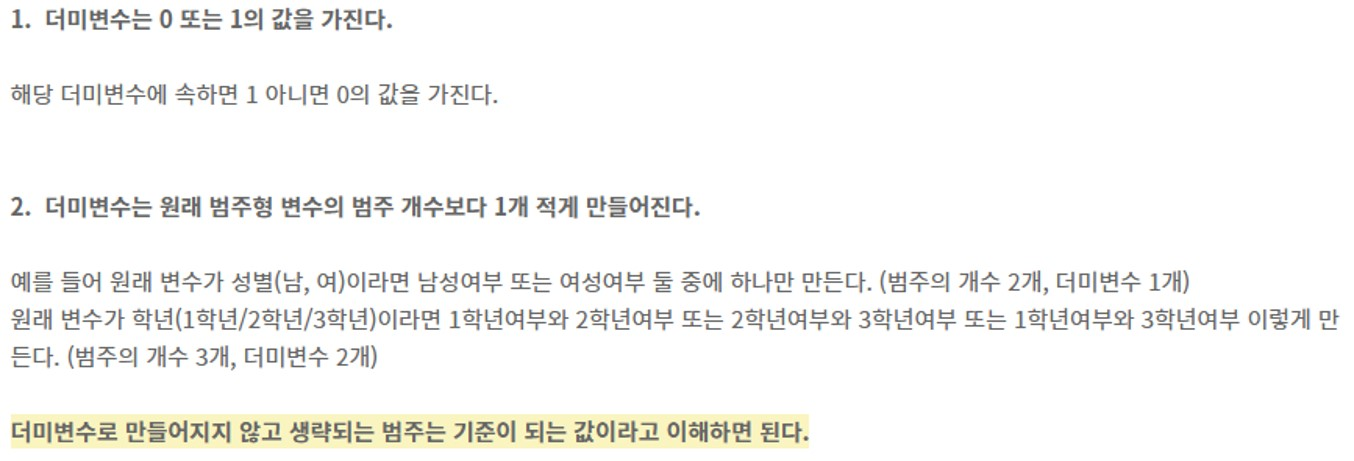

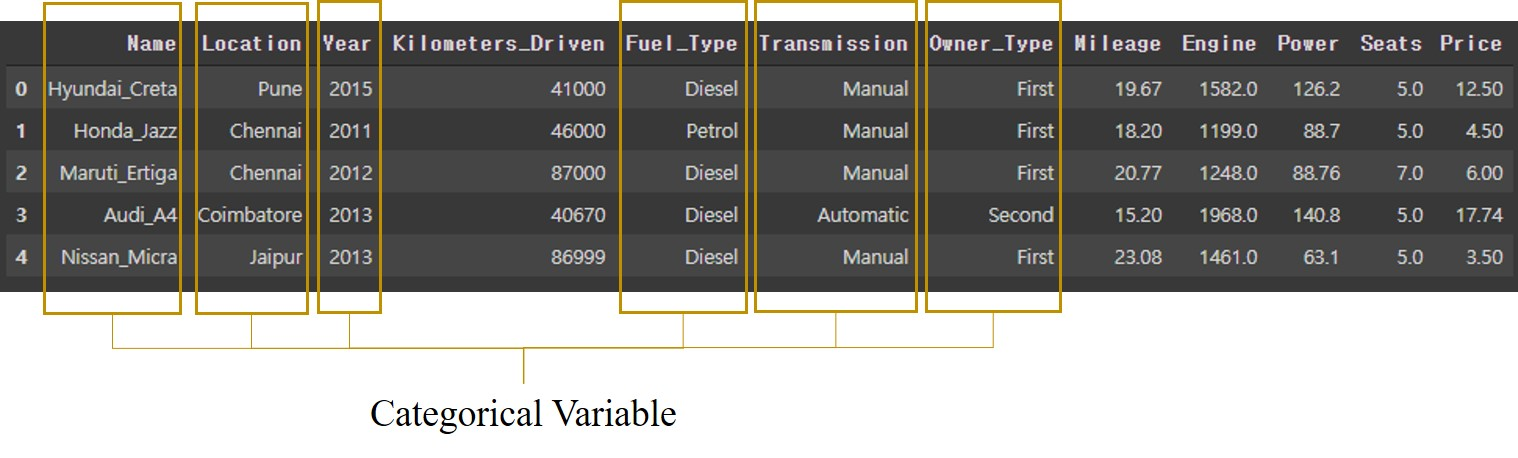

In [ ]:
#더미 변수화
df = pd.get_dummies(df, prefix_sep = '_', drop_first = True)
df.head(5)
#prefix_sep: Year이 1999이라면? Year_1999로 표현하겠다는 뜻

,Kilometers_Driven,Mileage,Engine,Power,Price,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,...,Maker_Mini,Maker_Mitsubishi,Maker_Nissan,Maker_Porsche,Maker_Renault,Maker_Skoda,Maker_Tata,Maker_Toyota,Maker_Volkswagen,Maker_Volvo
0,41000,19.67,1582,126.20,12.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46000,18.20,1199,88.70,4.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87000,20.77,1248,88.76,6.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40670,15.20,1968,140.80,17.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,86999,23.08,1461,63.10,3.50,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


**다중공선성(참고)**

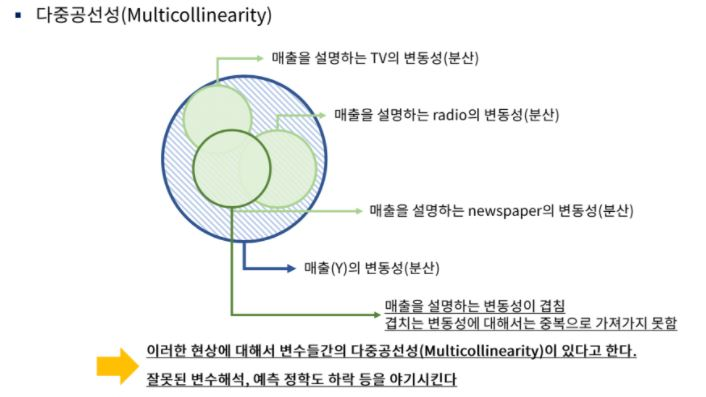

In [ ]:
#추정한 회귀 계수가 종속변수에 미치는 영향력을 어떻게 설명할 것인가?
#변수가 0 또는 1로만 표현되는데....

#2-3 Train / Test data 분리

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size = 0.8)
train = train.reset_index(drop=True) #reset_index(): 데이터프레임의 인덱스를 0부터 재정렬(drop = True : 기존 인덱스는 보존하지 않고 삭제)
test = test.reset_index(drop=True)
print(len(train))
print(len(test))

4444
1112


In [ ]:
col = list(train.columns)
print(col)

['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Year_1999', 'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0', 'Maker_Audi', 'Maker_BMW', 'Maker_Bentley', 'Maker_Chevrolet', 'Maker_Datsun', 'Maker_Fiat', 'Maker_Force', 'Maker_Ford', 'Maker_Honda', 'Maker_Hyundai', 'Maker_ISUZU', 'Maker_Isuzu', 'Maker_Jaguar', 'Maker_Jeep', 'Maker_LandRover', 'Maker_Mahindra', 'Maker_Maruti', 'Maker_Mercedes-Benz', 'Maker_Mini', 'Maker_Mitsubishi', 'Maker_Nissan', 'Maker_Porsche', 'Maker_Renault', 'Maker_Skoda', 'Maker_Tata', 'Maker_Toyota', 'Maker_Volkswagen', 'Maker_Volvo']


In [ ]:
#예측 변수 Price 삭제
col.remove('Price')

In [ ]:
col

In [ ]:
train
#현재 train이라는 변수는 데이터 프레임 형식을 가짐
#numpy의 Array 형식으로 변환하는 작업 필요(차원을 가진 벡터로만 표현)

,Kilometers_Driven,Mileage,Engine,Power,Price,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,...,Maker_Mini,Maker_Mitsubishi,Maker_Nissan,Maker_Porsche,Maker_Renault,Maker_Skoda,Maker_Tata,Maker_Toyota,Maker_Volkswagen,Maker_Volvo
0,69000,16.80,1497,116.30,4.90,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9107,20.40,1197,81.80,5.15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,55000,16.47,1198,73.90,2.25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,83184,14.28,1798,138.03,6.22,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,72000,17.05,1995,184.00,11.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,13460,18.60,1197,81.86,8.91,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4440,75014,21.10,1248,73.90,3.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4441,248000,12.80,2494,102.00,9.20,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4442,26966,20.36,1197,78.90,3.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(train[col].to_numpy().shape)

(4444, 58)


In [ ]:
trainY = train['Price'].to_numpy()
trainX = train[col].to_numpy()

testY = test['Price'].to_numpy()
testX = test[col].to_numpy()
trainX

array([[6.9000e+04, 1.6800e+01, 1.4970e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.1070e+03, 2.0400e+01, 1.1970e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.5000e+04, 1.6470e+01, 1.1980e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.4800e+05, 1.2800e+01, 2.4940e+03, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.6966e+04, 2.0360e+01, 1.1970e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.5000e+04, 2.0450e+01, 1.4610e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

#2-4. 데이터 스케일링

In [ ]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)

print(trainX)

[[0.08883121 0.5915493  0.16244883 ... 0.         0.         0.        ]
 [0.01153287 0.71830986 0.10662449 ... 0.         0.         0.        ]
 [0.07076271 0.57992958 0.10681057 ... 0.         1.         0.        ]
 ...
 [0.31984993 0.45070423 0.34797172 ... 1.         0.         0.        ]
 [0.03458182 0.71690141 0.10662449 ... 0.         0.         0.        ]
 [0.07076271 0.72007042 0.15574991 ... 0.         0.         0.        ]]


#3. 선형 회귀 모델 구축

In [ ]:
model = LinearRegression(fit_intercept = False, normalize = True)
#fit_intercept = X 데이터에 상수항인 Y절편을 포함시켰는가? No
#normalize = X 데이터를 정규화 하였는가? Yes

In [ ]:
model.fit(trainX, trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(fit_intercept=False, normalize=True)

#4. 모델 평가

In [ ]:
print('R-square: {}'.format(model.score(trainX, trainY)))
print('R-square: {}'.format(model.score(testX, testY)))

R-square: 0.7947640278381177
R-square: 0.7406319133999999


In [ ]:
List = list()

for i in zip(col, model.coef_):
  List.append(i)

print(List)

[('Kilometers_Driven', -8.569507250976642), ('Mileage', -3.9355997313494226), ('Engine', 5.78880874578479), ('Power', 39.53762888057196), ('Year_1999', 9.03051469438051), ('Year_2000', 7.680965677281621), ('Year_2001', 7.74003030703086), ('Year_2002', 7.978931922173862), ('Year_2003', 7.723064915985423), ('Year_2004', 5.952907883692351), ('Year_2005', 4.782201683636073), ('Year_2006', 5.890009874960027), ('Year_2007', 5.638123500859549), ('Year_2008', 5.580438708203571), ('Year_2009', 4.735723440848053), ('Year_2010', 6.176453471425792), ('Year_2011', 6.559796677331945), ('Year_2012', 7.978805016576638), ('Year_2013', 9.050134602018527), ('Year_2014', 10.193390653757364), ('Year_2015', 11.78189306510435), ('Year_2016', 13.063239485206637), ('Year_2017', 14.714509335267966), ('Year_2018', 16.699420939061344), ('Year_2019', 17.71024452103738), ('Fuel_Type_Petrol', -1.7617941206529952), ('Owner_Type_Fourth & Above', -0.5021454226283026), ('Owner_Type_Second', -0.40583889294581965), ('Owne

In [ ]:
pd.DataFrame(List, columns = ['Columns', 'Coeff'])
#추정한 회귀계수 출력 (절편추가해야 함)

,Columns,Coeff
0,Kilometers_Driven,-8.569507
1,Mileage,-3.935600
2,Engine,5.788809
3,Power,39.537629
4,Year_1999,9.030515
...,...,...
59,Maker_Skoda,5.748176
60,Maker_Tata,3.815302
61,Maker_Toyota,6.674188
62,Maker_Volkswagen,5.568572


In [ ]:
print(model.intercept_)

0.0


In [ ]:
from sklearn.metrics import mean_squared_error

train_predict = model.predict(trainX)
compare = pd.concat([pd.DataFrame(abs(train_predict)), pd.DataFrame(trainY)], axis = 1)
print(compare)
#왼쪽: 학습 데이터의 예측값, 오른쪽: 학습 데이터의 실제값

              0      0
0      3.699746   4.90
1      7.336770   5.15
2      1.009185   2.25
3      7.433640   6.22
4     19.136540  11.00
...         ...    ...
4439   8.574498   8.91
4440   0.837568   3.85
4441   5.821975   9.20
4442   0.582846   3.00
4443   4.970337   4.75

[4444 rows x 2 columns]


In [ ]:
#mean_squared_error(train_predict, trainY)
#출력값: 평균 제곱 오차

print('학습용 데이터셋의 평균 제곱 오차: {}'.format(round(mean_squared_error(train_predict, trainY), 2)))

학습용 데이터셋의 평균 제곱 오차: 24.58


In [ ]:
test_predict = model.predict(testX)
compare = pd.concat([pd.DataFrame(abs(test_predict)), pd.DataFrame(testY)], axis = 1)
compare.columns = ['Predict', 'Real']
print(compare)

        Predict   Real
0      6.943353   5.00
1      7.233360   6.80
2      5.323679   7.25
3      1.109087   2.85
4      0.832184   2.60
...         ...    ...
1107   0.107566   2.00
1108   1.805862   1.75
1109   8.415146   7.07
1110  23.196424  22.99
1111   3.870747   4.50

[1112 rows x 2 columns]


In [ ]:
print('테스트 데이터셋의 평균 제곱 오차: {}'.format(round(mean_squared_error(test_predict, testY), 2)))

테스트 데이터셋의 평균 제곱 오차: 38.05


#5. 모델 시각화

In [ ]:
#모델 예측 결과 시각화 (이러한 방식을 사용하는 이유는?)

#예를 들어 실제 값이 1인데 예측 값이 1이라면? 산점도의 (1, 1)에 위치할 것
#실제 값이 30인데 예측 값이 30? 산점도의 (30, 30)에 위치할 것

#즉, 실제 값과 예측 값이 같다면? 산점도에서 일직선으로 표현될 것

#정확히 예측했을 경우는, 일직선으로 표현된다는 것임

#이를 기준으로 얼마나 예측 값이 벗어났는지에 대해 시각적으로 표현해볼 수 있음

(0.0, 70.0)

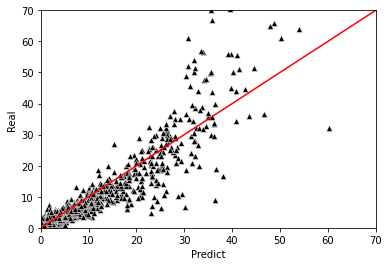

In [ ]:
import seaborn as sns
sns.scatterplot(x = compare['Predict'], y = compare['Real'], marker = '^', color = 'black')
plt.plot([0, 70], [0, 70], color = 'red')
plt.xlim([0, 70])
plt.ylim([0, 70])

In [ ]:
from sklearn.metrics import mean_squared_error
compare['Residual'] = compare['Real'] - compare['Predict']

compare

,Predict,Real,Residual
0,6.943353,5.00,-1.943353
1,7.233360,6.80,-0.433360
2,5.323679,7.25,1.926321
3,1.109087,2.85,1.740913
4,0.832184,2.60,1.767816
...,...,...,...
1107,0.107566,2.00,1.892434
1108,1.805862,1.75,-0.055862
1109,8.415146,7.07,-1.345146
1110,23.196424,22.99,-0.206424


Text(0.5, 1.0, 'Box Plot')

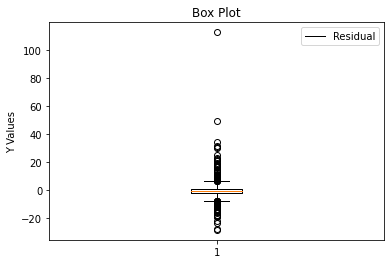

In [ ]:
#잔차 시각화
plt.boxplot(compare['Residual'])#잔차를 matplotlib 라이브러리를 활용하여 그리는 함수
plt.legend(['Residual'])
plt.ylabel('Y Values')
plt.title('Box Plot')

#대칭 형태의 분포를 가짐

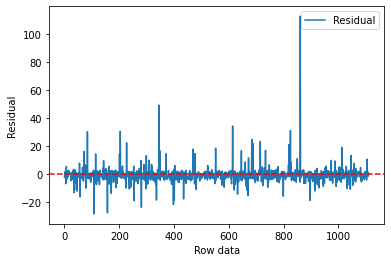

In [ ]:
plt.plot(compare['Residual'])
plt.legend(['Residual'])

plt.xlabel('Row data')
plt.ylabel('Residual')
plt.axhline(0, color = 'red', linestyle = '--')

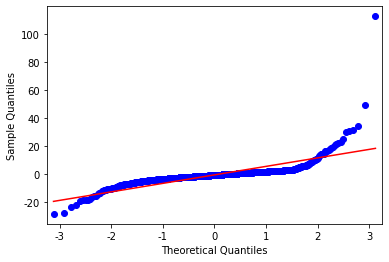

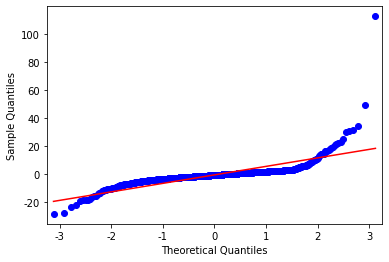

In [ ]:
import statsmodels.api as sm

model_residuals = compare['Residual']
#model_residuals 라는 변수에 '잔차 값' 할당
plt.rcParams['axes.unicode_minus'] = False
sm.ProbPlot(model_residuals).qqplot(line = 's')

Text(0, 0.5, 'Count')

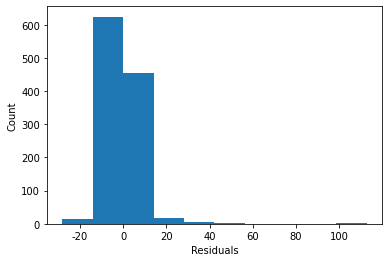

In [ ]:
plt.hist(model_residuals.values)
plt.xlabel('Residuals')
plt.ylabel('Count')
#잔차의 분포
#정규 분포의 형태를 띔